# Linear Regression Examples

In [52]:
import time
import pylab
import numpy as np
import seaborn as sns
import tensorflow as tf

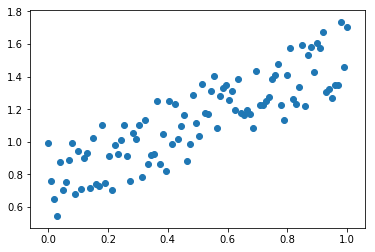

In [53]:
#test data
X = np.linspace(0,1,100)
noise = np.random.random(100)*0.5
y = 0.8*X + 0.5 + noise 
n = X.shape[0]
#show the data
pylab.scatter(X,y)
pylab.show()

In [54]:
#parameters
learning_rate = 0.1
epochs = 500 
step = 100

In [55]:
#tf required setting 
tf_X = tf.placeholder("float")
tf_y = tf.placeholder("float")
#tf learning parameters
w = tf.Variable(np.random.random(),name="weight")
b = tf.Variable(np.random.random(),name="bias")

In [56]:
#a linear model
pred = tf.add(tf.multiply(tf_X,w),b)
cost = tf.reduce_sum(tf.pow(pred-tf_y,2)) / (2*n)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [57]:
#tf graph for running
ss,ys = [],[]
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in xrange(epochs):
        for (nx,ny) in zip (X,y):
            sess.run(optimizer,feed_dict={tf_X:nx,tf_y:ny})
        if epoch % step == 0:
            c = sess.run(cost,feed_dict={tf_X:X,tf_y:y})
            s = "Epoch:%s,cost:%s,w:%s,b:%s"%(epoch,c,sess.run(w),sess.run(b))
            ss.append(s)
            ys.append(sess.run(w)*X+sess.run(b))

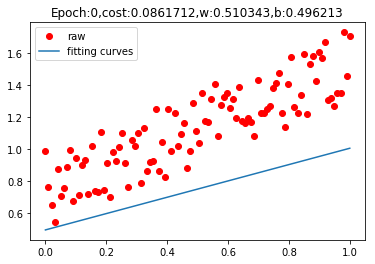

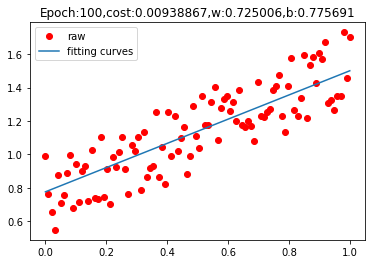

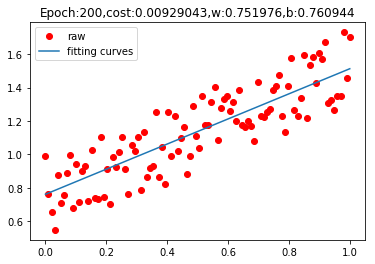

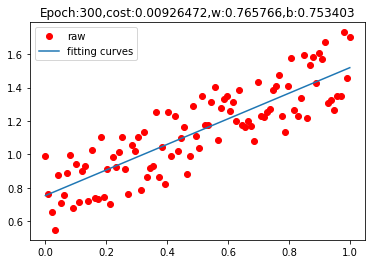

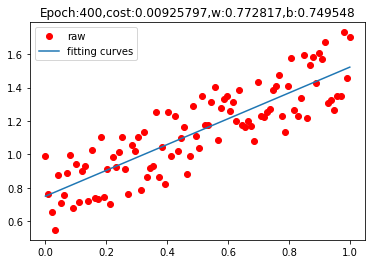

In [58]:
#show the process
for i in xrange(len(ys)):
    pylab.plot(X,y,"ro",label="raw")
    pylab.plot(X,ys[i],label="fitting curves")
    pylab.title(ss[i])
    time.sleep(0.1)
    pylab.legend()
    pylab.show()
